# Deep Learning Model for Character Recognition

This module is used to prepare a deep learning model based on convolution neural networks to recognise the characters in the
licence plate.

!!! Note: You should verify every path in this file before using it.

## Import of necessary libraries

In [1]:
# libraries used for the model building

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers
import datetime
import pickle


print(tf.__version__)

# libraries used to show the example of use

import numpy as np
import cv2
import matplotlib.pyplot as plt



2.3.0


# 1- Model training

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(
        'D:/Hawk_Eye_version_1.0_LP_recog/Hawk_Eye_version_1.0_LP_recog/Licence_Plate_Recognition/data/train',  # this is the target directory. It contains the different classes of the characters.
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'D:/Hawk_Eye_version_1.0_LP_recog/Hawk_Eye_version_1.0_LP_recog/Licence_Plate_Recognition/data/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28        batch_size=1,
        class_mode='categorical')

Found 623 images belonging to 11 classes.
Found 66 images belonging to 11 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001), metrics=['accuracy'])

In [11]:
class stop_training_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc') > 0.992):
      self.model.stop_training = True

In [16]:
import datetime
!rm -rf logs
log_dir="D:/Hawk_Eye_version_1.0_LP_recog/Hawk_Eye_version_1.0_LP_recog/Licence_Plate_Recognition/data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [7]:
batch_size = 1
#callbacks = [tensorboard_callback, stop_training_callback()]
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
623/623 [==============================] - 23s 37ms/step - loss: 2.2768 - accuracy: 0.2167 - val_loss: 2.0480 - val_accuracy: 0.4697
Epoch 2/80
623/623 [==============================] - 11s 18ms/step - loss: 1.9442 - accuracy: 0.4045
Epoch 3/80
623/623 [==============================] - 11s 18ms/step - loss: 1.5197 - accuracy: 0.6100
Epoch 4/80
623/623 [==============================] - 12s 19ms/step - loss: 1.2314 - accuracy: 0.6774
Epoch 5/80
623/623 [==============================] - 13s 20ms/step - loss: 1.0135 - accuracy: 0.7223
Epoch 6/80
623/623 [==============================] - 12s 19ms/step - loss: 0.8400 - accuracy: 0.7881
Epoch 7/80
623/623 [==============================] - 12s 19ms/step - loss: 0.7091 - accuracy: 0.8042
Epoch 8/80
623/623 [==============================] - 13s 20ms/step - loss: 0.6837 - accuracy: 0.7978
Epoch 9/80
623/623 [==============================] - 12s 20ms/ste

623/623 [==============================] - 12s 20ms/step - loss: 0.0298 - accuracy: 0.99200s - l
Epoch 74/80
623/623 [==============================] - 13s 20ms/step - loss: 0.0285 - accuracy: 0.9952
Epoch 75/80
623/623 [==============================] - 13s 20ms/step - loss: 0.0265 - accuracy: 0.9968
Epoch 76/80
623/623 [==============================] - 13s 21ms/step - loss: 0.0319 - accuracy: 0.9936
Epoch 77/80
623/623 [==============================] - 12s 20ms/step - loss: 0.0253 - accuracy: 0.9936
Epoch 78/80
623/623 [==============================] - 13s 22ms/step - loss: 0.0282 - accuracy: 0.9920
Epoch 79/80
623/623 [==============================] - 13s 22ms/step - loss: 0.0383 - accuracy: 0.9888
Epoch 80/80
623/623 [==============================] - 13s 21ms/step - loss: 0.0266 - accuracy: 0.9920


In [17]:
# !kill 8400
%load_ext tensorboard
%tensorboard --logdir D:/Hawk_Eye_version_1.0_LP_recog/Hawk_Eye_version_1.0_LP_recog/Licence_Plate_Recognition/data/logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13180), started 0:00:02 ago. (Use '!kill 13180' to kill it.)

In [9]:
#_, accuracy = model.evaluate
test_loss, test_acc = model.evaluate(train_generator, validation_generator, verbose=2)

print('\nTest accuracy:', test_acc)

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

## Model Saving

In [46]:
# # save model and architecture to single file
model.save("Recognition_Model.h5")
print("Saved model to disk")

Saved model to disk


## Load of the saved model

In [5]:
model = tf.keras.models.load_model('ocrmodel.h5')

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        55328     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 11)                1419      
Total params: 859,691
Trainable params: 859,691
Non-trainable params: 0
________________________________________________

# 2- An Example of Licence Plate Recognition

We redefine here the segmentation funtion defined in the "Data Preprocessing & Cleaning" module to show the example of use.
Because the prediction input must be a list of LP characters cropped, and each one will be recognised by the deep learning model. 

In [17]:
def histogram_of_pixel_projection(img):
    """
    
    This method is responsible for licence plate segmentation with histogram of pixel projection approach
    
    :param: input image
    
    :return: list of image, each one contain a digit or the word "تونس"
    
    """
    # list that will contains all digits
    caracrter_list_image = list()

    # img = crop(img)

    # Add black border to the image
    BLACK = [0, 0, 0]
    img = cv2.copyMakeBorder(img, 3, 3, 3, 3, cv2.BORDER_CONSTANT, value=BLACK)

    # change to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Change to numpy array format
    nb = np.array(gray)

    # Binarization
    nb[nb > 120] = 255
    nb[nb < 120] = 0

    # compute the sommation
    x_sum = cv2.reduce(nb, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S)
    y_sum = cv2.reduce(nb, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32S)

    # rotate the vector x_sum
    x_sum = x_sum.transpose()

    # get height and weight
    x = gray.shape[1]
    y = gray.shape[0]

    # division the result by height and weight
    x_sum = x_sum / y
    y_sum = y_sum / x

    # x_arr and y_arr are two vector weight and height to plot histogram projection properly
    x_arr = np.arange(x)
    y_arr = np.arange(y)

    # convert x_sum to numpy array
    z = np.array(x_sum)

    # convert y_arr to numpy array
    w = np.array(y_sum)

    # convert to zero small details
    z[z < 15] = 0
    z[z > 15] = 1

    # convert to zero small details and 1 for needed details
    w[w < 20] = 0
    w[w > 20] = 1

    # vertical segmentation
    test = z.transpose() * nb

    # horizontal segmentation
    test = w * test

    # plot histogram projection result using pyplot
    horizontal = plt.plot(w, y_arr)
    #plt.show()
    vertical = plt.plot(x_arr ,z)
    #plt.show()
    #plt.show(horizontal)
    #plt.show(vertical)

    f = 0
    ff = z[0]
    t1 = list()
    t2 = list()
    for i in range(z.size):
        if z[i] != ff:
            f += 1
            ff = z[i]
            t1.append(i)
    rect_h = np.array(t1)

    f = 0
    ff = w[0]
    for i in range(w.size):
        if w[i] != ff:
            f += 1
            ff = w[i]
            t2.append(i)
    rect_v = np.array(t2)

    # take the appropriate height
    rectv = []
    rectv.append(rect_v[0])
    rectv.append(rect_v[1])
    max = int(rect_v[1]) - int(rect_v[0])
    for i in range(len(rect_v) - 1):
        diff2 = int(rect_v[i + 1]) - int(rect_v[i])

        if diff2 > max:
            rectv[0] = rect_v[i]
            rectv[1] = rect_v[i + 1]
            max = diff2

    # extract caracter
    for i in range(len(rect_h) - 1):

        # eliminate slice that can't be a digit, a digit must have width bigger then 8
        diff1 = int(rect_h[i + 1]) - int(rect_h[i])

        if (diff1 > 5) and (z[rect_h[i]] == 1):
            # cutting nb (image) and adding each slice to the list caracrter_list_image
            caracrter_list_image.append(nb[int(rectv[0]):int(rectv[1]), rect_h[i]:rect_h[i + 1]])

            # draw rectangle on digits
            cv2.rectangle(img, (rect_h[i], rectv[0]), (rect_h[i + 1], rectv[1]), (0, 255, 0), 1)

    # Show segmentation result
    image = plt.imshow(img)
    plt.show()
    #plt.show(image)

    return caracrter_list_image

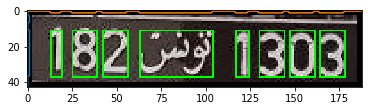

In [19]:
Tunisian_LP =  cv2.imread("D:\\Hawk_Eye_version_1.0_LP_recog\\Hawk_Eye_version_1.0_LP_recog\\LP_2.jpg")
char_TN_LP = histogram_of_pixel_projection(Tunisian_LP)

In [21]:
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def show_results(char):
    dic = {}
    characters = '0123456789T'
    for i,c in enumerate(characters):
        dic[i]=c

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = model.predict_classes(img)[0] #predicting the class
        #print(y_)
        character = dic[y_] #
        if(character=="T"):
            output.append("Tunisie")
        else:
            output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return output

print(show_results(char_TN_LP))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
['1', '8', '2', 'Tunisie', '1', '3', '0', '3']


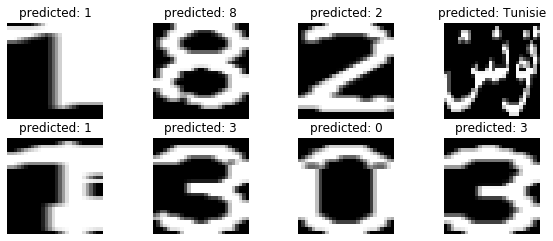

In [23]:
plt.figure(figsize=(10,6))
#char=K[1]
for i,ch in enumerate(char_TN_LP):
    img = cv2.resize(ch, (28,28))
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results(char_TN_LP)[i]}')
    plt.axis('off')
    plt.savefig('prediction_result.jpg')
plt.show()



## The result of the recognition

In [25]:
Lp=""
for i,ch in enumerate(char_TN_LP):
     Lp+=show_results(char_TN_LP)[i]+" "
print(Lp)    

1 8 2 Tunisie 1 3 0 3 


## Written By : Ghassene Tanabene - September 2020
#### Intern at Chambi Eagle Technology
#### From the National School of Computer Sciences - ENSI